## Data visualization

In [140]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from PIL import Image

In [141]:
import seaborn as sns

sns.set_theme()
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_palette("viridis")

title_fontsize = '25'

In [142]:
image_folder_path = '../images/aculei-images/'

In [143]:
df = pd.read_csv('../aculei.csv', index_col=0)
df['camera'].isnull().sum()

4452

In [144]:
# sorting a lil bit
df.sort_values('date', inplace=True)
df.sort_values('camera', inplace=True)

In [145]:
# modifying date_time column dtype
df['date_time'] = pd.to_datetime(df['date_time'])

### Some insigths about the data

In [146]:
df.shape

(16874, 6)

In [147]:
df.sample(5)

,image_name,camera,date_time,date,time,moon
13269,TF_ACULEI_11723_DSCF0003.jpg,CAM_7,2022-07-28 07:02:19,2022-07-28,07:02:19,New Moon
9381,TF_ACULEI_16034_DSCF0652.jpg,NaN,2023-06-05 03:44:56,2023-06-05,03:44:56,Full Moon
3297,TF_ACULEI_15721_DSCF0055.jpg,NaN,2023-05-03 20:39:53,2023-05-03,20:39:53,Full Moon
10442,TF_ACULEI_2569_DSCF2573.jpg,CAM_1,2021-06-08 01:47:32,2021-06-08,01:47:32,Waning Crescent
1215,TF_ACULEI_8625_DSCF0706.jpg,CAM_1,2021-07-28 04:14:49,2021-07-28,04:14:49,Waning Gibbous


In [148]:
print('Null values\n')
print(df.isnull().sum())

Null values

image_name       0
camera        4452
date_time      103
date           103
time           103
moon           103
dtype: int64


In [149]:
print('Unique cameras\n')
print(df['camera'].value_counts())

Unique cameras

CAM_1    9076
CAM_4    1047
CAM_3     995
CAM_5     671
CAM_6     247
CAM_7     198
CAM_2     188
Name: camera, dtype: int64


In [150]:
print('Time period\n')

min = df['date_time'].min()
max = df['date_time'].max()

print(f'Min date: {min}\nMax date: {max}')

Time period

Min date: 2021-01-03 22:21:33
Max date: 2023-09-28 01:00:12


In [151]:
print('Moon phases recorded\n')
print(df['moon'].value_counts())

Moon phases recorded

Full Moon          2698
First Quarter      2609
Waxing Gibbous     2113
Waning Crescent    2049
Waning Gibbous     2039
Last Quarter       1861
New Moon           1755
Waxing Crescent    1647
Name: moon, dtype: int64


### Data visualization

In [152]:
# adding info to plot easier
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')
df['year'] = df['date'].dt.to_period('Y')
df['day'] = df['date'].dt.to_period('d')

In [153]:
df.head()

,image_name,camera,date_time,date,time,moon,month,year,day
16660,TF_ACULEI_146_DSCF0012.jpg,CAM_1,2021-02-08 22:58:41,2021-02-08,22:58:41,Waning Crescent,2021-02,2021,2021-02-08
16157,TF_ACULEI_6212_DSCF6555.jpg,CAM_1,2021-06-25 00:29:29,2021-06-25,00:29:29,Full Moon,2021-06,2021,2021-06-25
1325,TF_ACULEI_6309_DSCF6652.jpg,CAM_1,2021-06-25 00:50:13,2021-06-25,00:50:13,Full Moon,2021-06,2021,2021-06-25
10485,TF_ACULEI_6182_DSCF6525.jpg,CAM_1,2021-06-25 00:20:26,2021-06-25,00:20:26,Full Moon,2021-06,2021,2021-06-25
8110,TF_ACULEI_6219_DSCF6562.jpg,CAM_1,2021-06-25 00:31:02,2021-06-25,00:31:02,Full Moon,2021-06,2021,2021-06-25


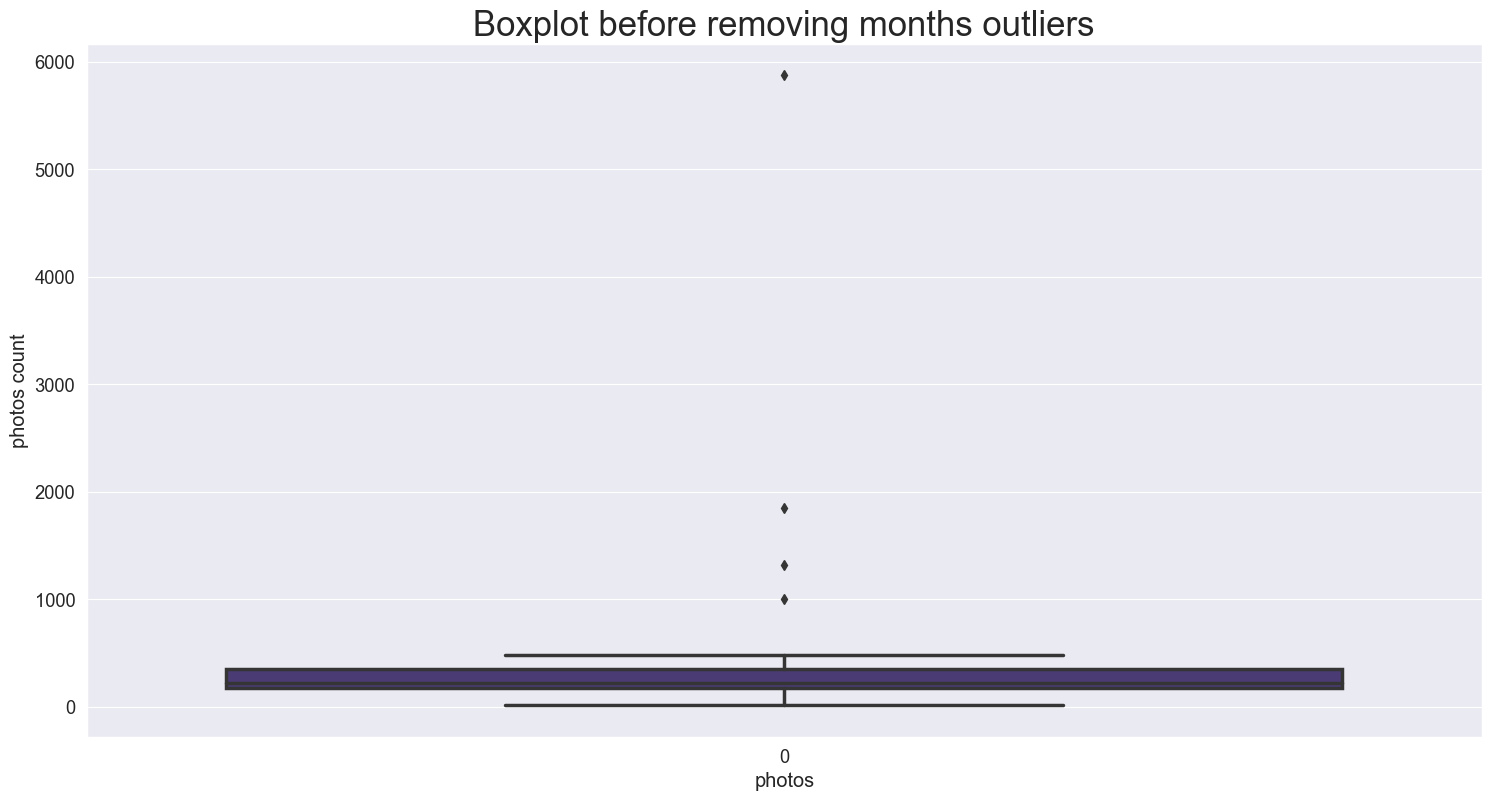

In [154]:
photos_per_month = df.groupby(['month']).size().reset_index(name='photos')
photos_per_month['month'] = photos_per_month['month'].apply(lambda x: str(x)) 

plt.figure(figsize=(18, 9))
ax = sns.boxplot(photos_per_month['photos'])
plt.title('Boxplot before removing months outliers', fontsize=title_fontsize)
plt.ylabel('photos count')
plt.xlabel('photos')
plt.show()

In [155]:
# remove outliers ? 
df = df[df['month'] != '2021-06'].copy()
df = df[df['month'] != '2021-05'].copy()
df = df[df['month'] != '2021-07'].copy()
df = df[df['month'] != '2023-01'].copy()

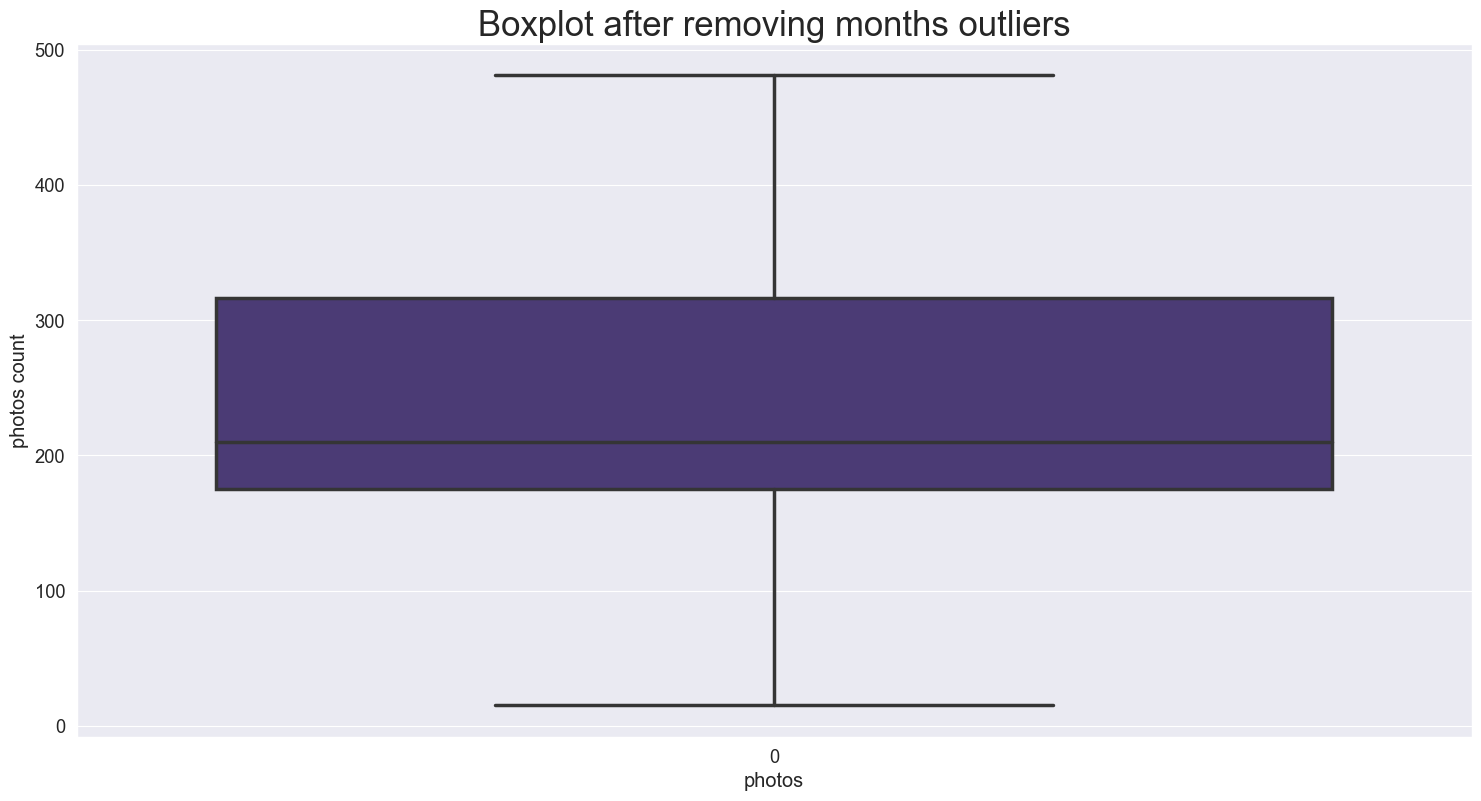

In [156]:
photos_per_month = df.groupby(['month']).size().reset_index(name='photos')
photos_per_month['month'] = photos_per_month['month'].apply(lambda x: str(x)) 

plt.figure(figsize=(18, 9))
ax = sns.boxplot(photos_per_month['photos'])
plt.title('Boxplot after removing months outliers', fontsize=title_fontsize)
plt.ylabel('photos count')
plt.xlabel('photos')
plt.show()

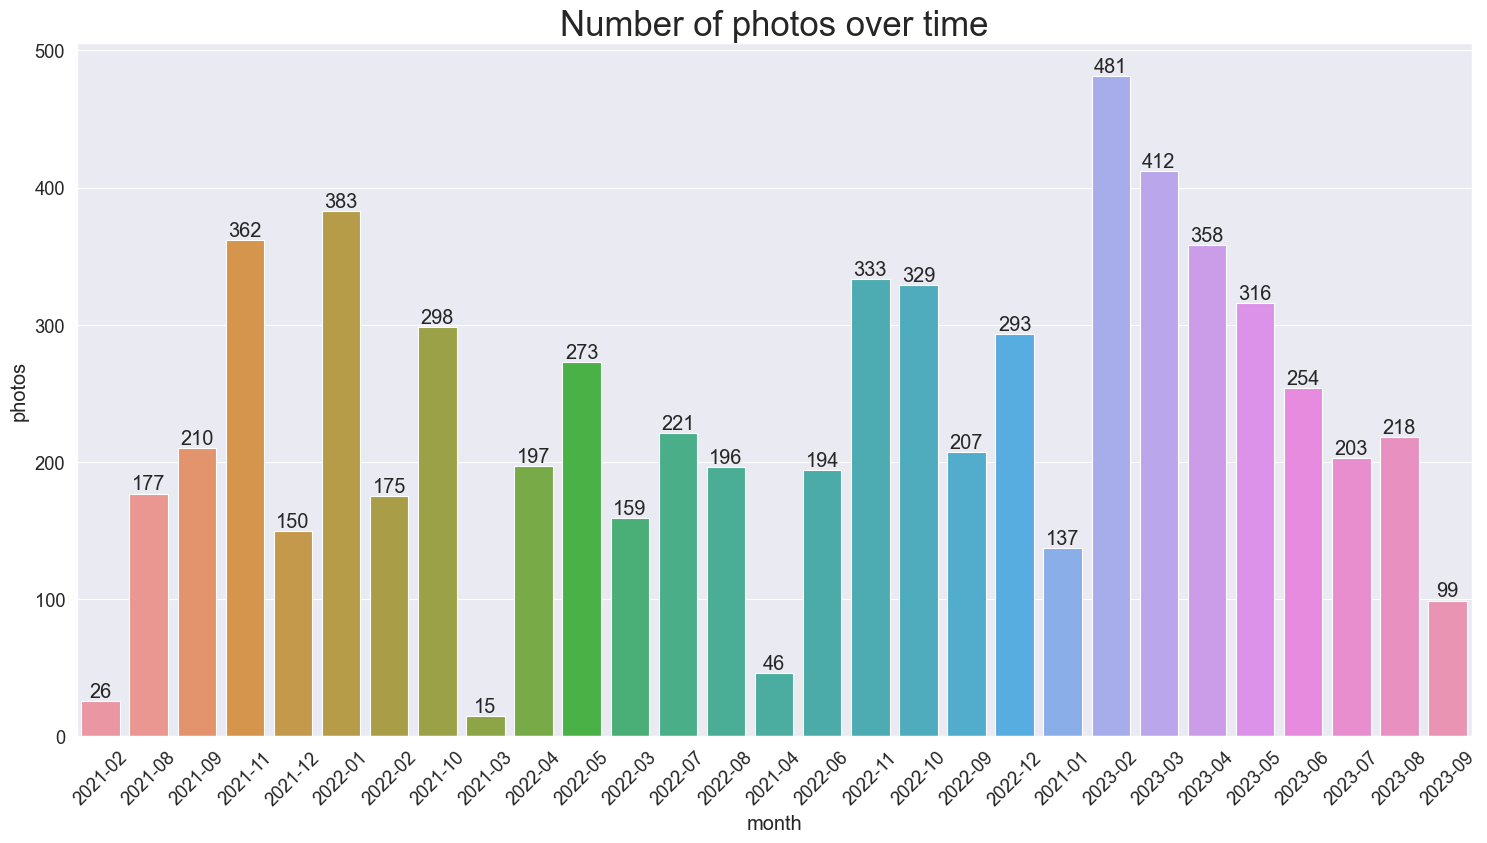

In [157]:
plt.figure(figsize=(18, 9))
ax = sns.countplot(data=df, x='month')

plt.title('Number of photos over time', fontsize=title_fontsize)
plt.ylabel('photos')
plt.xlabel('month')
plt.xticks(rotation=45)

ax.bar_label(ax.containers[0])
plt.show()

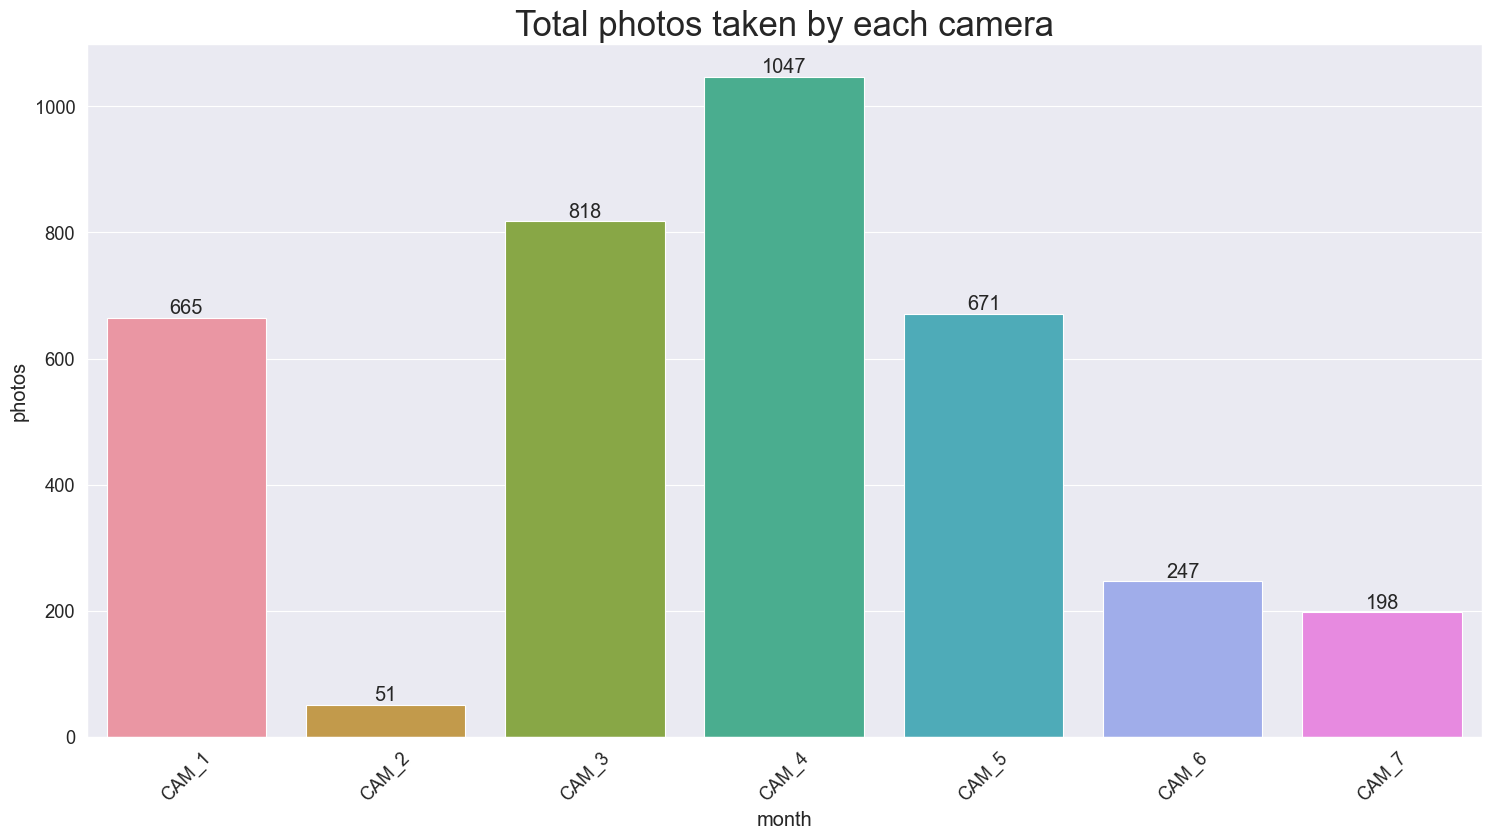

In [158]:
plt.figure(figsize=(18, 9))

ax = sns.countplot(data=df, x='camera')

plt.title('Total photos taken by each camera', fontsize=title_fontsize)
plt.ylabel('photos')
plt.xlabel('month')
plt.xticks(rotation=45)

ax.bar_label(ax.containers[0])
plt.show()

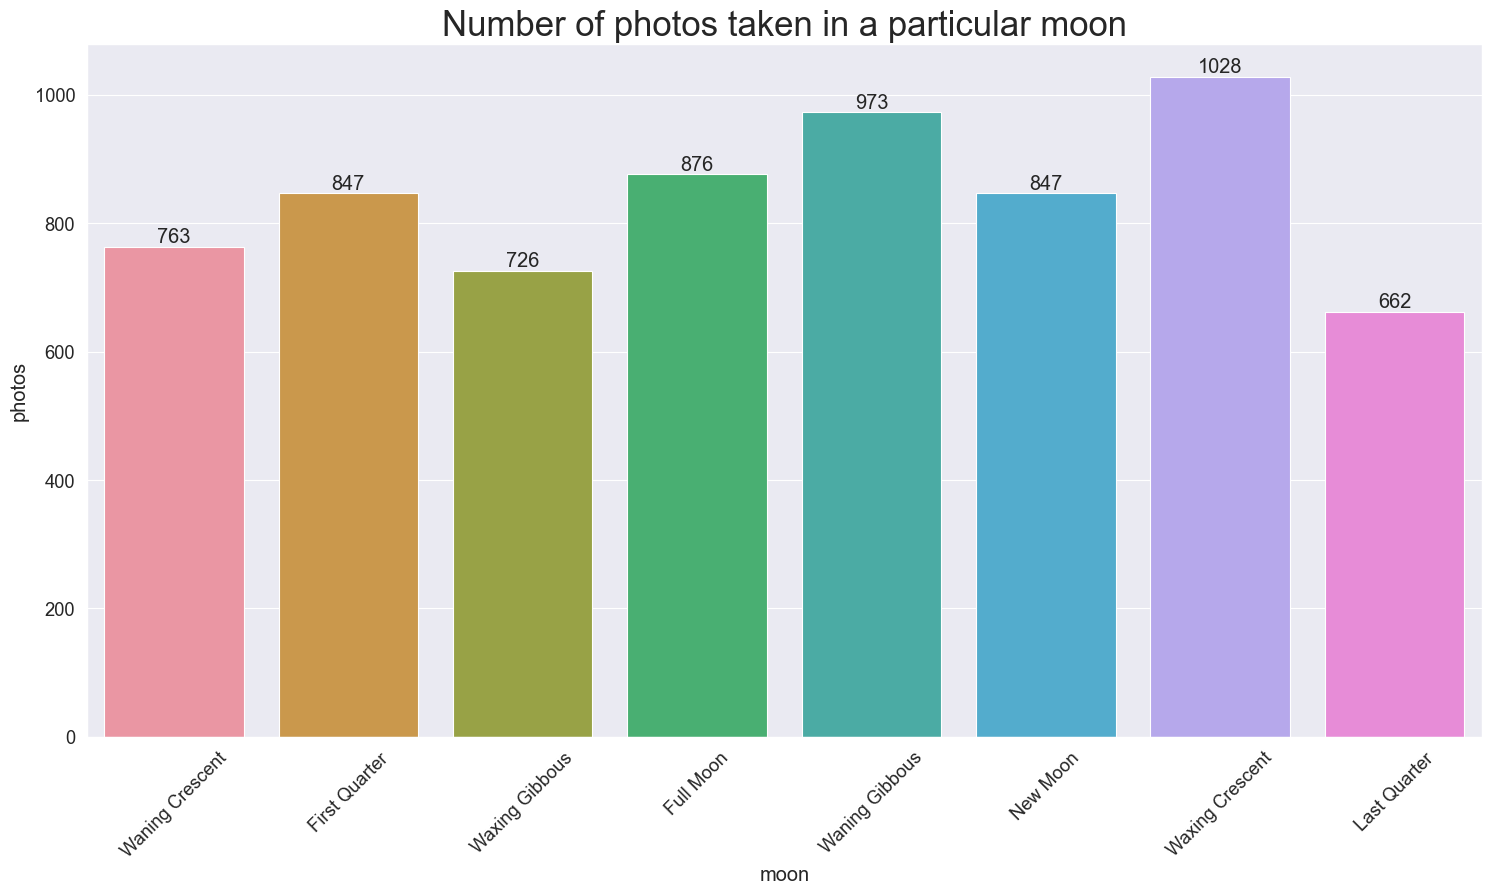

In [159]:
plt.figure(figsize=(18, 9))

ax = sns.countplot(data=df, x='moon')

plt.title('Number of photos taken in a particular moon', fontsize=title_fontsize)
plt.ylabel('photos')
plt.xlabel('moon')
plt.xticks(rotation=45)

ax.bar_label(ax.containers[0])
plt.show()

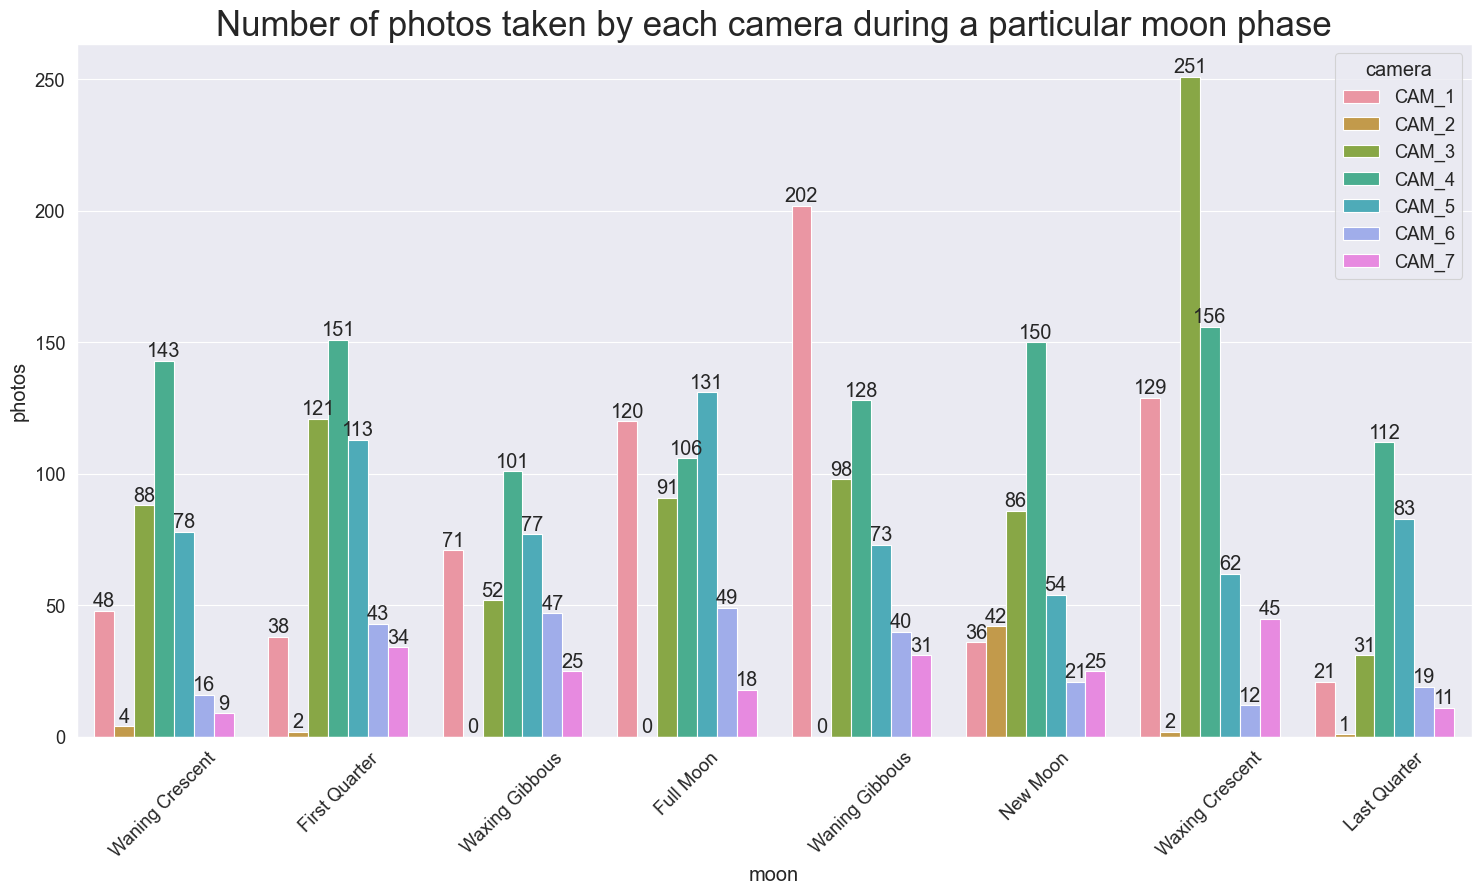

In [160]:
plt.figure(figsize=(18, 9))
ax = sns.countplot(data=df, x='moon', hue='camera')

plt.title('Number of photos taken by each camera during a particular moon phase', fontsize=title_fontsize)
plt.ylabel('photos')
plt.xlabel('moon')
plt.xticks(rotation=45)

for i in range(0, 7):
    ax.bar_label(ax.containers[i])

plt.show()

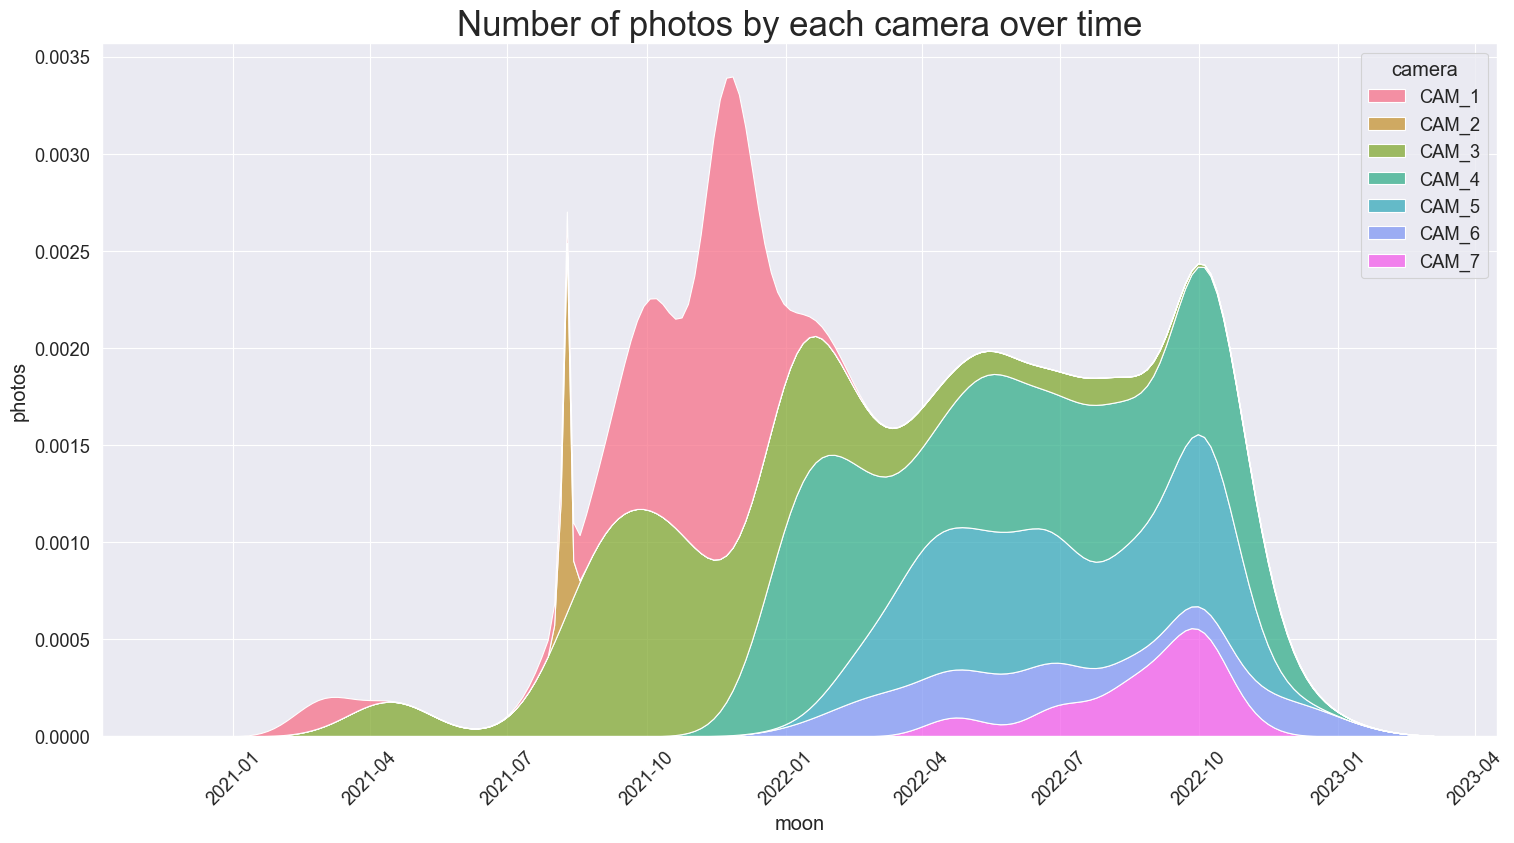

In [161]:
plt.figure(figsize=(18, 9))
sns.kdeplot(data=df, x="date_time", hue="camera", multiple="stack")

plt.title('Number of photos by each camera over time', fontsize=title_fontsize)
plt.ylabel('photos')
plt.xlabel('moon')
plt.xticks(rotation=45)

plt.show()


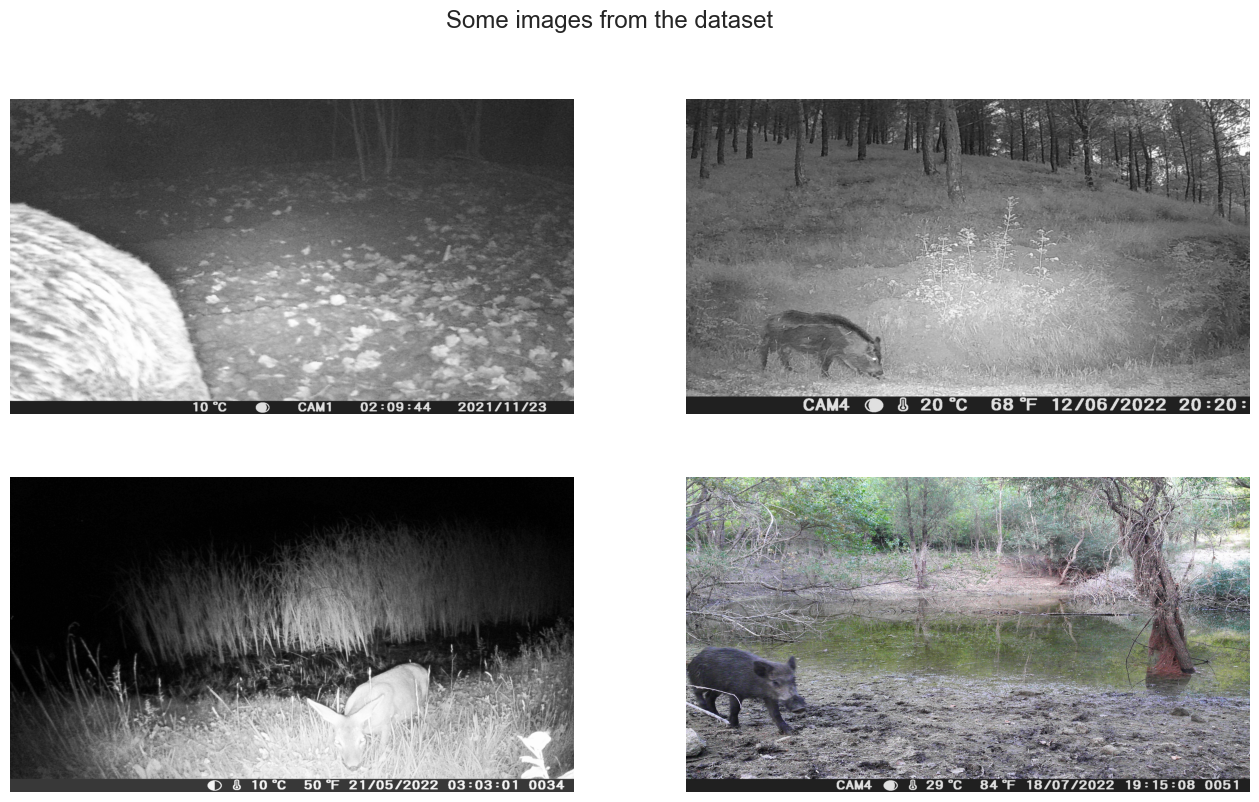

In [162]:
import random

four_random_images = df['image_name'].sample(n=4, random_state=random.seed()).tolist()
paths = [os.path.join(image_folder_path, image) for image in four_random_images]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 9))
fig.suptitle('Some images from the dataset')

for i, ax in enumerate([ax1, ax2, ax3, ax4]):
    image = Image.open(paths[i])
    ax.imshow(image, aspect='auto')
    ax.axis('off')

plt.show()